# Exercise executions table analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Numerical-data" data-toc-modified-id="Numerical-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Numerical data</a></span><ul class="toc-item"><li><span><a href="#Summary-statistics" data-toc-modified-id="Summary-statistics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Summary statistics</a></span></li><li><span><a href="#Normal-distribution-evaluation" data-toc-modified-id="Normal-distribution-evaluation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Normal distribution evaluation</a></span></li><li><span><a href="#Evaluation-of-distribution" data-toc-modified-id="Evaluation-of-distribution-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Evaluation of distribution</a></span></li><li><span><a href="#Outliers-detection" data-toc-modified-id="Outliers-detection-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Outliers detection</a></span></li></ul></li><li><span><a href="#Categorical-data" data-toc-modified-id="Categorical-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Categorical data</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pingouin as pg
import statsmodels.api as sm
import matplotlib as mpl
from scipy import stats
from distfit import distfit

pd.options.display.float_format = '{:.2f}'.format



In [2]:
exercise_executions = pd.read_csv('/home/evida-monika/mhunters/exercise_executions.csv', on_bad_lines='skip', low_memory=False, header = None)

exercise_executions.columns = ['id', 'exercise_id', 'session_set_execution_id', 
                              'reps_executed', 'execution_time',
                              'order', 'created_at', 'updated_at']

col_date = ['created_at', 'updated_at']

for col in col_date:
    exercise_executions[col] = pd.to_datetime(exercise_executions[col])#.dt.strftime("%Y-%m-%d %H:%M:%S")


## Introduction

In this document there will be statistical analysis of Exercise executions table. 
Exercise executions table has 8 variables (columns) and 2190289 records. 
There is no missing data.
For the analysis below libraries will be used:

* pandas
* numpy
* statistics
* matplotlib.pyplot
* seaborn
* pingouin
* distfit

Below there are information about this dataset and glimpse of the data.

In [3]:
exercise_executions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190289 entries, 0 to 2190288
Data columns (total 8 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   id                        int64         
 1   exercise_id               int64         
 2   session_set_execution_id  int64         
 3   reps_executed             int64         
 4   execution_time            int64         
 5   order                     int64         
 6   created_at                datetime64[ns]
 7   updated_at                datetime64[ns]
dtypes: datetime64[ns](2), int64(6)
memory usage: 133.7 MB


In [4]:
exercise_executions.head()

,id,exercise_id,session_set_execution_id,reps_executed,execution_time,order,created_at,updated_at
0,1279660,5236,47654,10,66,1,2021-10-29 13:07:01.918992,2021-10-29 13:07:01.918992
1,1279661,5968,47654,0,15,2,2021-10-29 13:07:01.924569,2021-10-29 13:07:01.924569
2,1279662,5317,47654,10,11,3,2021-10-29 13:07:01.929730,2021-10-29 13:07:01.929730
3,1279663,5968,47654,0,15,4,2021-10-29 13:07:01.934805,2021-10-29 13:07:01.934805
4,1279664,5222,47654,10,19,5,2021-10-29 13:07:01.940808,2021-10-29 13:07:01.940808


In this dataset there are columns that are connections to other tables like:

* *exercise_id* - id of exercise from *Exercises* table,
* *session_set_execution_id* - id of session set execution from *session_set_executions*.

The other variables are:

* *reps_executed* - how many times the person did reps per the exercise,
* *execution_time* - how many seconds did someone did an exercise (when the reps are 0, that means the exercise didn't have reps, only time value),
* *order* - what number in the set has an exercise,
* *created_at*, *updated_at* - date when was the exercise execution report created and last updated.




## Numerical data

Even though *exercise_id* and *session_set_execution_id* are "numerical" data, but they can't be treated that way, because they are ID values for other tables. So here, only 

* *execution_time* and
* *reps_executed*

will be taken as numerical values.

### Summary statistics

Below there is summary statistics about this variable that contains mean, standard deviation, minimum, maximum, quartiles, variance, skewness, kurtosis and NULL count.

In [5]:
num_t = exercise_executions.loc[:, ['reps_executed', 'execution_time']]
num_t_desc = num_t.describe()
num_t_desc = num_t_desc.transpose()
num_t_desc["var"] = num_t.var()
num_t_desc["skewness"] = num_t.skew()
num_t_desc["kurtosis"] = num_t.kurtosis()
num_t_desc["NULL count"] = num_t.isna().sum()
num_t_desc

,count,mean,std,min,25%,50%,75%,max,var,skewness,kurtosis,NULL count
reps_executed,2190289.00,1161.65,1435245.61,0.00,0.00,4.00,10.00,2111101111.00,2059929957000.34,1454.43,2137328.05,0
execution_time,2190289.00,28.77,39.40,0.00,2.00,21.00,42.00,4893.00,1552.06,16.56,931.01,0


Mean value of executed reps is 1162 (SD 1235246) which is a lot and may indicate that there are outliers in the data. Median value is 4 (IQR 0 - 10) so it is not a lot of reps executed (but what should be remembered is that there are some exercises that didn't have any reps but only a time value). Maximum value of executed reps is 2111101111 which is for sure an outlier. 
Mean value of execution time is almost 29 seconds per exercise (SD 39). Median value is 4 seconds (IQR 2 - 42) and maximum value is 4893 seconds (during one exercise!), which may indicate outliers in the variable.

### Normal distribution evaluation

In this section, the normal distribution evaluation will be done. For this purpose, there will be histogram, qqplot and Shapiro-Wilk test done. Below there is a histogram of the MET values.

Below there are histograms.

Text(0.5, 0.98, 'Histogram for numeric variables')

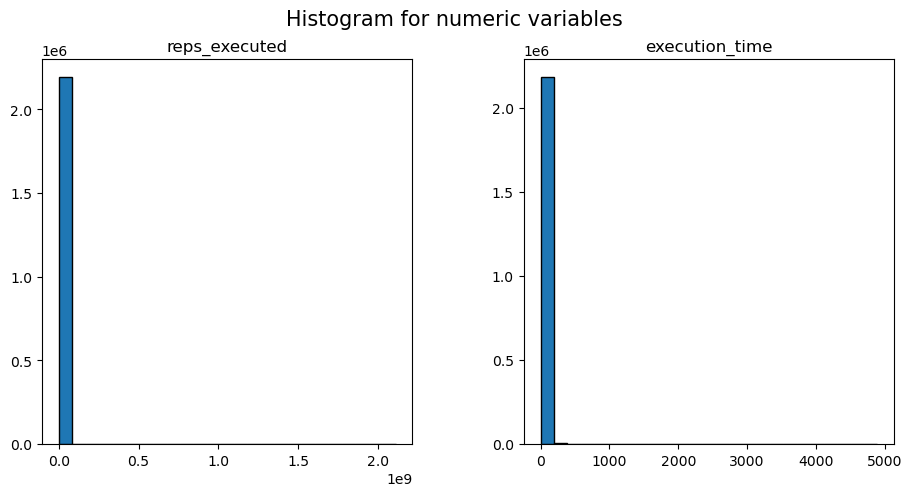

In [6]:
num_t.hist(layout=(1,2), grid = False, bins = 25, edgecolor='black', figsize=(11,5))
plt.suptitle('Histogram for numeric variables', fontsize = 15)

Below there are qqplots for both variables.

Text(0.5, 1.05, 'QQ plots for numeric variables')

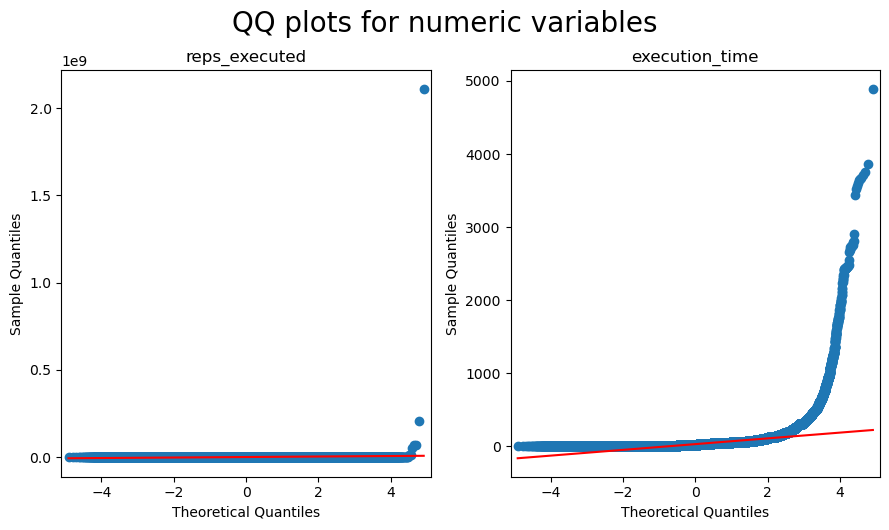

In [7]:
fig, axes = plt.subplots(ncols=2, nrows=1, sharex=True, figsize=(9, 5))
for k, ax in zip(num_t.columns, np.ravel(axes)):

        sm.qqplot(num_t[k], line='s', ax=ax)
        ax.set_title(f'{k}')
plt.tight_layout()
plt.suptitle('QQ plots for numeric variables', fontsize = 20, y = 1.05)

And last, but not least, below there is the table with Shapiro-Wilk test statistics.

In [8]:
normal = pg.normality(num_t, method='shapiro').round(3)
normal

,W,pval,normal
reps_executed,0.00,0.00,False
execution_time,0.56,0.00,False


From histograms, qqplots and Shapiro-Wilk normality tests show that there is no normality in the data. Kutosis and skewness also confirms it.

### Evaluation of distribution

In this section, data distribution will be checked (or the closest one). The criterion of determination for best fit is RSS (residual sum of squares). The RSS describes the deviation predicted from actual empirical values of data.

* *reps_executed* - the most fitting distribution is *dweibull*, then *uniform*, *genextreme*, *gamma* and *t*. Below there are values of the RSS and plot of $5$ best fitted distribution.

[distfit] >fit..
[distfit] >transform..
[distfit] >[dweibull  ] [52.0 sec] [RSS: 5.24103e-16] [loc=-0.000 scale=1137173.473]
[distfit] >[uniform   ] [0.00 sec] [RSS: 5.49726e-16] [loc=0.000 scale=2111101111.000]
[distfit] >[genextreme] [61.6 sec] [RSS: 5.60937e-16] [loc=0.754 scale=1.412]
[distfit] >[gamma     ] [21.4 sec] [RSS: 5.60938e-16] [loc=-0.000 scale=1280962594.759]
[distfit] >[t         ] [93.9 sec] [RSS: 5.60943e-16] [loc=-0.000 scale=0.000]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot summary..


(<Figure size 900x400 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: dweibull'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

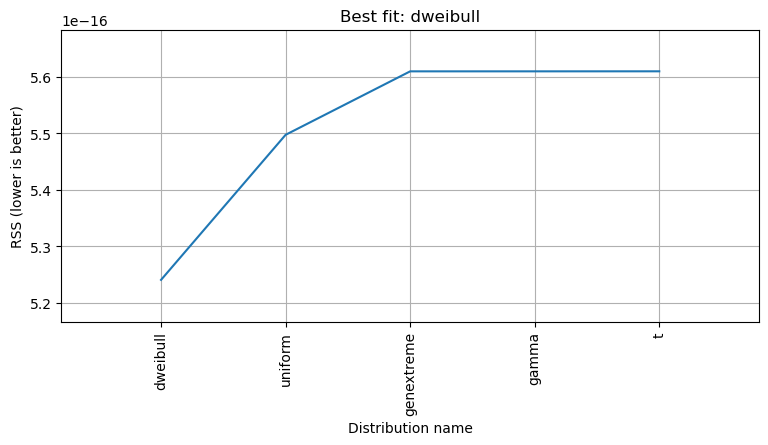

In [11]:
reps = num_t['reps_executed'].values
dist = distfit(distr = ['dweibull', 'uniform', 'genextreme', 'gamma', 't'])
dist.fit_transform(reps)
#dist.summary # there can be also dist.plot() and it gives the plot of distribution 
dist.plot_summary(figsize = (9,4))

* *execution_time* - the best fitting distribution is *t*, then *dweibull*, *loggamma*, *expon* and *beta*.

[distfit] >fit..
[distfit] >transform..
[distfit] >[t       ] [86.5 sec] [RSS: 4.64755e-06] [loc=22.735 scale=20.685]
[distfit] >[dweibull] [11.1 sec] [RSS: 4.8063e-06] [loc=23.429 scale=23.018]
[distfit] >[loggamma] [22.0 sec] [RSS: 6.35825e-06] [loc=-19598.473 scale=2502.081]
[distfit] >[expon   ] [0.00 sec] [RSS: 1.26784e-05] [loc=0.000 scale=28.772]
[distfit] >[beta    ] [45.4 sec] [RSS: 2.98369e-05] [loc=-0.000 scale=15543.086]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot summary..


(<Figure size 900x400 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: t'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

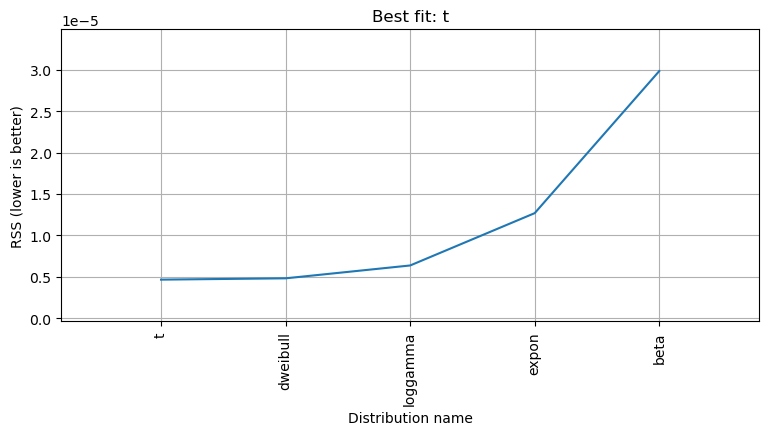

In [17]:
time = num_t['execution_time'].values
dist = distfit(distr = ['t', 'dweibull', 'loggamma', 'expon', 'beta'])
dist.fit_transform(time)
#dist.summary # there can be also dist.plot() and it gives the plot of distribution 
dist.plot_summary(figsize = (9,4))

### Outliers detection

The outliers detection will be done as soon as definition of an outlier will be specified.

## Categorical data

It is possible to count *order* variable as categorical variable. 

In [15]:
exercise_executions['order'] = exercise_executions['order'].astype('category')

In [16]:
def my_freq_table(data, var, sort = True, cumul_percent = False):
    myFreqTable = data[var].value_counts()
    myFreqTable = pd.DataFrame({var: myFreqTable.keys(), 'Frequency': myFreqTable.values})
    myFreqTable = myFreqTable.astype({'Frequency': 'int32'})
    
    if sort == True:
        myFreqTable = myFreqTable.sort_values(by=[var])
        myFreqTable = myFreqTable.reset_index(drop=True)
    
    myFreqTable['Percent'] = myFreqTable['Frequency']/myFreqTable['Frequency'].sum()*100
    
    sum_row1 = myFreqTable['Frequency'].sum()
    sum_row2 = myFreqTable['Percent'].sum()
    sum_row2 = sum_row2.round(2).astype('str') + '%'
    
    myFreqTable['Percent'] = myFreqTable['Percent'].round(2).astype('str') + '%'
    
    if cumul_percent == True:
        myFreqTable['Cumulative Percent'] = myFreqTable['Frequency'].cumsum() / myFreqTable['Frequency'].sum() * 100
        myFreqTable['Cumulative Percent'] = myFreqTable['Cumulative Percent'].round(2).astype('str') + '%'
        sum_row_c = '-'
    
    '''
    if valid_percent == True:
    
        myMissingCategory = [np.NaN]

        myFreqTable2 = myFreqTable
        isNonmisAr = np.array([])

        for i in data[var]:
            isNotMissing=1
            for j in myMissingCategory:
                if i==j:
                    isNotMissing=0
            isNonmisAr = np.append(isNonmisAr, [isNotMissing])
        
        validSum = sum(myFreqTable2['Frequency']*isNonmisAr)
        validPerc = myFreqTable2['Frequency']/validSum*isNonmisAr*100
        
        for i in range(len(validPerc)):
            if isNonmisAr[i]==0:
                validPerc[i]=np.nan
        
        myFreqTable2['Valid Percent'] = validPerc
        
        if cumul_percent == True:
            myFreqTable2['Cumulative Valid Percent'] = myFreqTable2['Valid Percent'].cumsum()
            
            sum_c_2 = '-'
            
            myFreqTable2['Cumulative Valid Percent'] = myFreqTable2['Cumulative Valid Percent'].round(2).astype('str') + '%'
        
        sum_valid_percent = myFreqTable2['Valid Percent'].sum()
        
        myFreqTable2['Valid Percent'] = myFreqTable2['Valid Percent'].round(2).astype('str') + '%'
        
        sum_valid_percent = sum_valid_percent.round(2).astype('str') + '%'
        
        #myFreqTable2 = myFreqTable2.set_index(var)
        
        # return(myFreqTable2)
    
       
    if (valid_percent == True) and (cumul_percent == True):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c, 
                    'Valid Percent': sum_valid_percent,
                    'Cumulative Valid Percent': sum_c_2}
        
    elif (valid_percent == False) and (cumul_percent == True):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c}
        
    elif (valid_percent == True) and (cumul_percent == False):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2,
                    'Valid Percent': sum_valid_percent}
            
    else: new_rows = {'Frequency': sum_row1, 'Percent': sum_row2}
    
    if valid_percent == True:
        myFreqTable = myFreqTable2
    '''
    
    if cumul_percent == True:
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c}
    else: new_rows = {'Frequency': sum_row1, 'Percent': sum_row2}
    
    myFreqTable = myFreqTable.append(new_rows, ignore_index=True)
    cats = data[var].cat.add_categories(['Total'])
    myFreqTable.set_index(cats.cat.categories, inplace = True)
    
    cols = myFreqTable.columns
    
    for col in cols:
        if col == var:
            myFreqTable = myFreqTable.drop(var, axis = 1)
    #myFreqTable.rename(index = {'NaN': 'Total'}, inplace = True)
    
    return(myFreqTable)
    

Below there is a frequency table of orders. It says how many exercises were done in each order.

In [23]:
my_freq_table(exercise_executions, 'order').sort_values(by = 'Frequency', ascending = False)

,Frequency,Percent
Total,2190289,100.0%
1,659413,30.11%
2,636362,29.05%
3,520425,23.76%
4,138942,6.34%
5,66593,3.04%
13,47360,2.16%
6,39927,1.82%
7,19290,0.88%
8,16047,0.73%


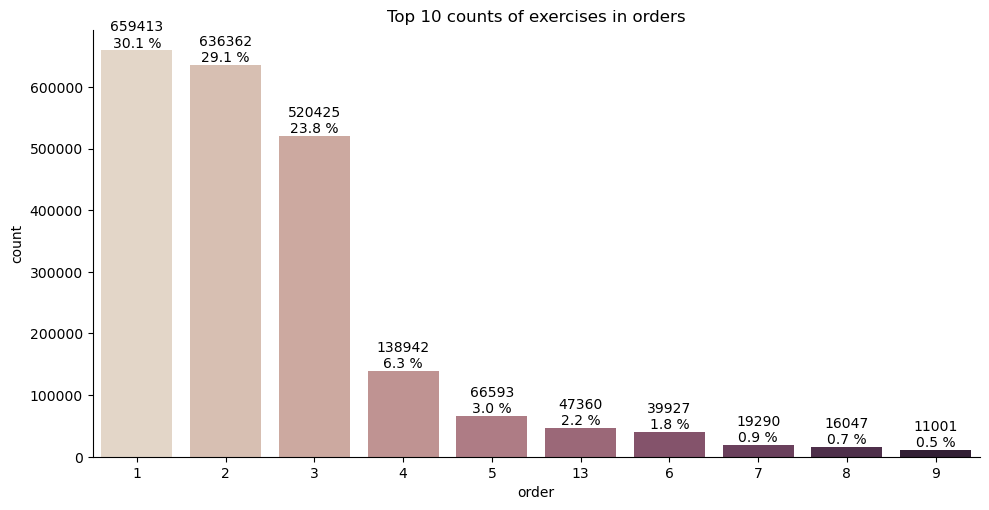

In [27]:
total = exercise_executions['order'].count()
g = sns.catplot(data=exercise_executions, x='order', kind="count", palette="ch:.20",
                order=exercise_executions.order.value_counts().iloc[:10].index, 
                height=5, aspect=2).set(title = 'Top 10 counts of exercises in orders')

#g.set_xticklabels(rotation = 90)

ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{v.get_height()}\n{v.get_height()/total * 100.0:.1f} %' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

The biggest number of exercises was done as a first exercise (30% of all executed exercises), then second (29%), third (24%), fourth (6%) and fifth (3%). What is interesting there were more executed exercises in order equal to 13 tan in order equal to 6.